In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport
sns.set_style('darkgrid')



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings('ignore')


In [2]:
init_notebook_mode(connected=True)
print(__version__) # requires version >= 1.9.0

5.18.0


In [3]:
data=pd.read_csv('../data/insurance_claims.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
profile = ProfileReport(data, title="Pandas Profiling Report")

profile.to_file("EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
data.drop('_c39',axis=1,inplace=True)

In [11]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
object_columns = list(data.select_dtypes(['object']).columns)
len(object_columns)

21

In [13]:
numeric_columns=list(data.select_dtypes('number'))
len(numeric_columns)

18

In [14]:
data.select_dtypes('number').describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [15]:
data.select_dtypes('object').describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,2006-01-01,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2015-02-02,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


In [16]:
data.duplicated().sum()

0

In [17]:
object_columns

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [18]:
for column in object_columns: 
    print("\033[1m","*, Column: ", column,"\033[0m")   
    print('\t',len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), 
          "% non-null") 
    if len(data[column].unique())<=10:
            print('\t',data[column].unique())


 *, Column:  policy_bind_date 
	 951 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  policy_state 
	 3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['OH' 'IN' 'IL']
 *, Column:  policy_csl 
	 3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['250/500' '100/300' '500/1000']
 *, Column:  insured_sex 
	 2 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['MALE' 'FEMALE']
 *, Column:  insured_education_level 
	 7 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
 *, Column:  insured_occupation 
	 14 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  insured_hobbies 
	 20 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  insured_relationship 
	 6 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
 *, Column:  incident_date 
	

In [19]:
(data[object_columns]=='?').sum()

policy_bind_date             0
policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_date                0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
incident_location            0
property_damage            360
police_report_available    343
auto_make                    0
auto_model                   0
fraud_reported               0
dtype: int64

Các cột như collision_type (loại hình va chạm), property_damage (thiệt hại tài sản), police_report_available (báo cáo của cảnh sát) không thế nào mang giá trị đặc biệt dấu '?' được. Có thể trong quá trình thu thập dữ liệu xuất hiện lỗi, sơ sót, hoặc điều tra viên, bộ phận thu thập dữ liệu không xác định rõ.
Các thuộc tính trên có thể là một đặc trưng quan trọng trong những mô hình dự đoán liên quan đến mức độ thiệt hại hoặc hồ sơ thật giả của công ty bảo hiểm, cần lưu ý để tránh đưa ra sai sót trong quá trình phân tích dữ liệu

In [20]:
for column in object_columns:
    print('-'*100)
    print("*, Column: ", column)
    print(data[column].value_counts())
    print('-'*100)

----------------------------------------------------------------------------------------------------
*, Column:  policy_bind_date
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
--------------------------------------------------

In [21]:
for column in object_columns:
    if len(data[column].unique())<=10:
        data[column].value_counts().iplot(kind='bar',title=column, 
                                        xTitle=column, 
                                        yTitle='Values')

    


In [22]:
#Biến liên tục
numeric_columns = list(data.select_dtypes(['number']).columns)
numeric_columns

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [23]:
for column in numeric_columns: 
    print("*, Column: ", column)   
    print(len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), 
          "% non-null")
    if len(data[column].unique())<=10:
        print(data[column].unique())
    
   

*, Column:  months_as_customer
391 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  age
46 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  policy_number
1000 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  policy_deductable
3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
[1000 2000  500]
*, Column:  policy_annual_premium
991 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  umbrella_limit
11 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  insured_zip
995 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  capital-gains
338 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  capital-loss
354 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  incident_hour_of_the_day
24 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  number_of_vehicles_involved
4 unique values 	 & 	 1000 non-null value

In [24]:
change_tocategory=[i for i in numeric_columns if len(data[i].unique())<=10]
change_tocategory

['policy_deductable',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses']

In [25]:
#data[change_tocategory]=data[change_tocategory].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [26]:
for c in numeric_columns:
    data[c].iplot(kind='hist',title=c,xTitle=c)
    plt.show()

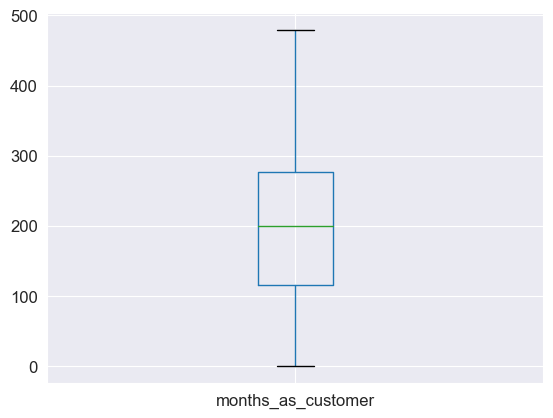

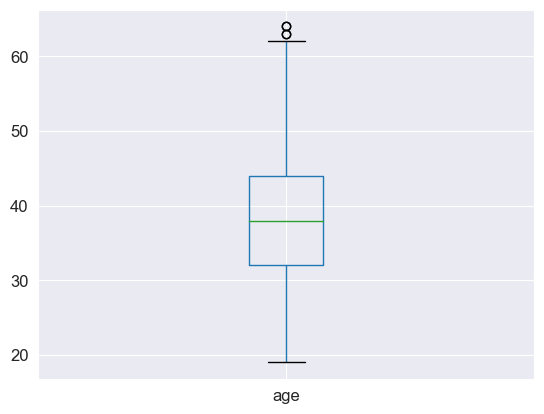

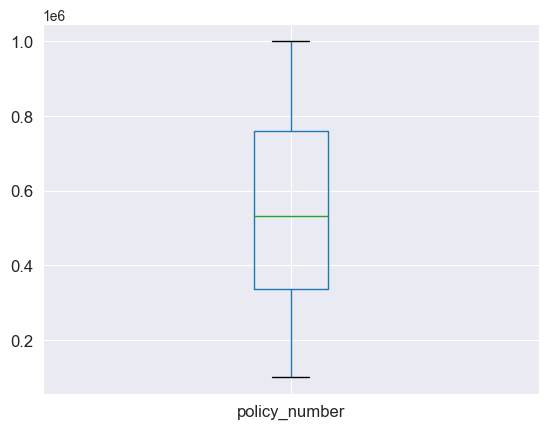

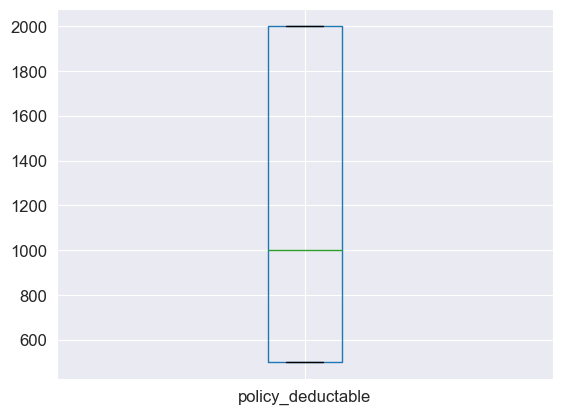

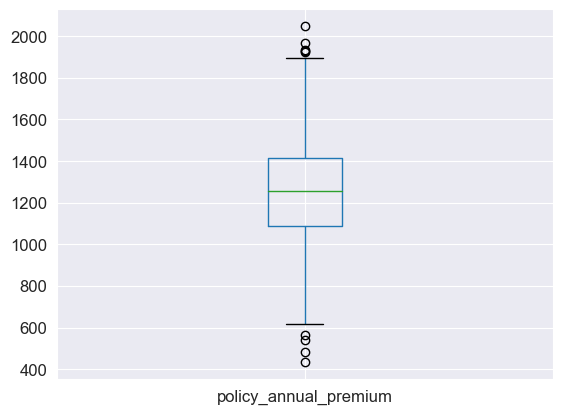

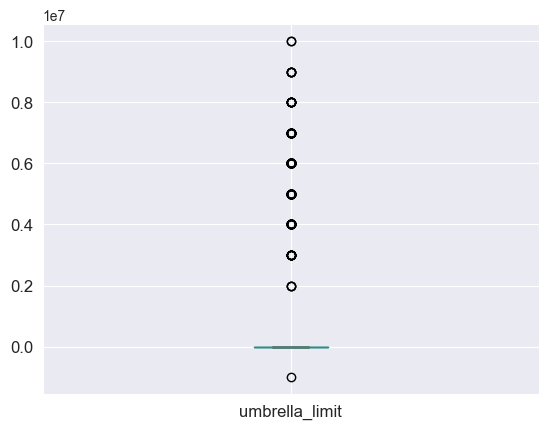

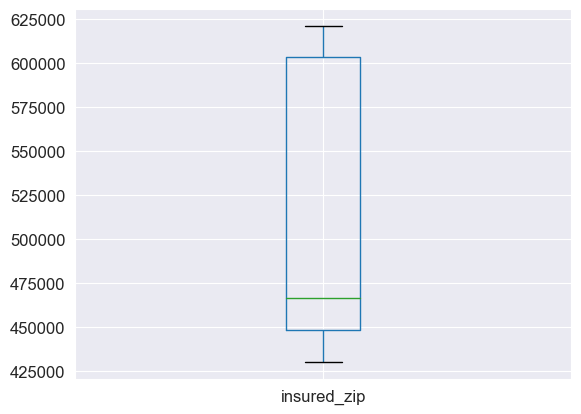

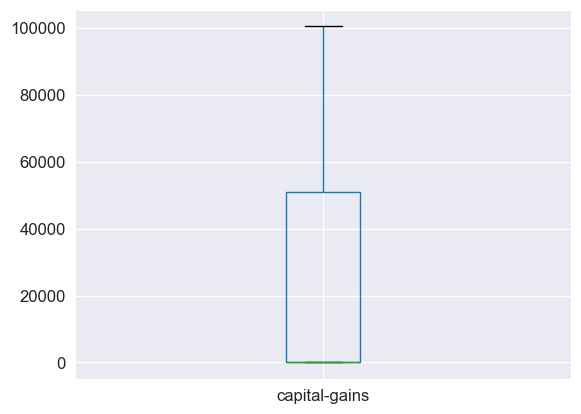

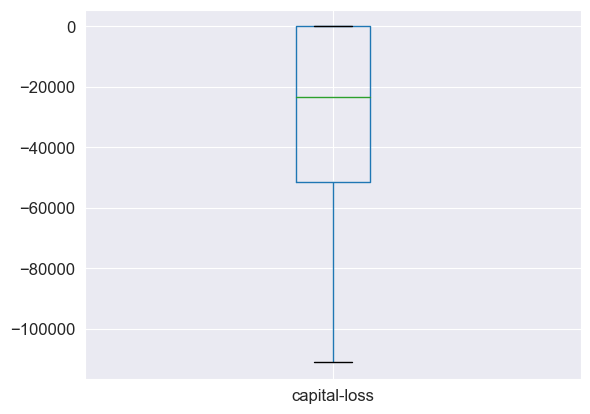

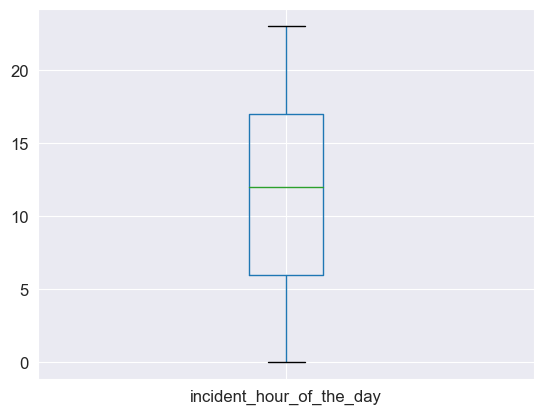

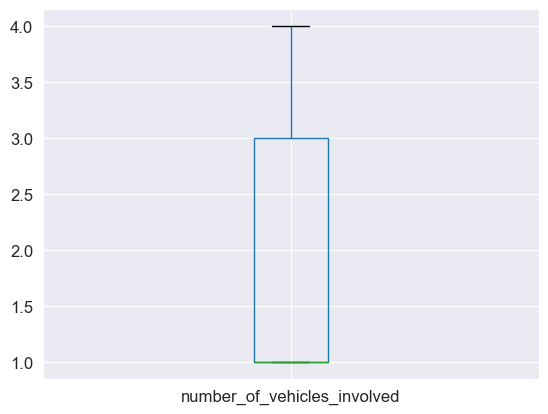

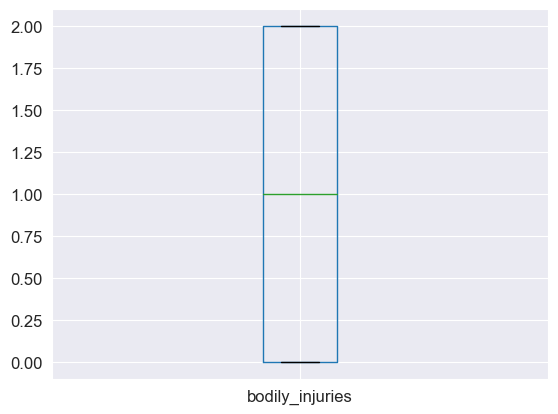

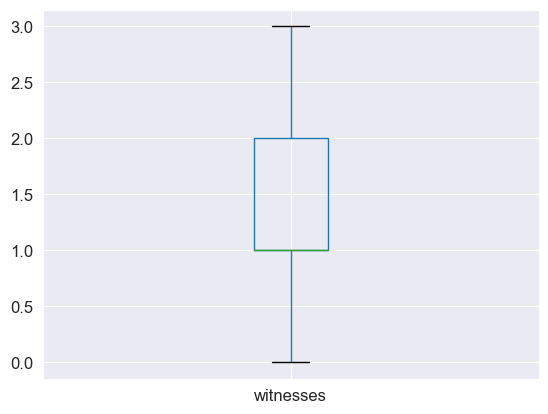

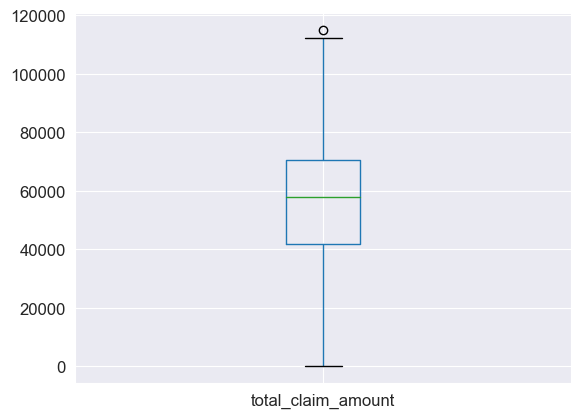

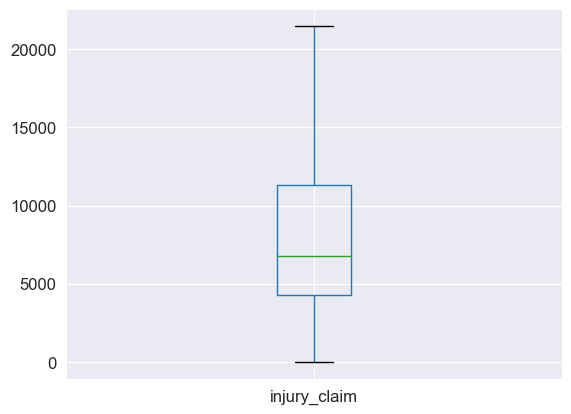

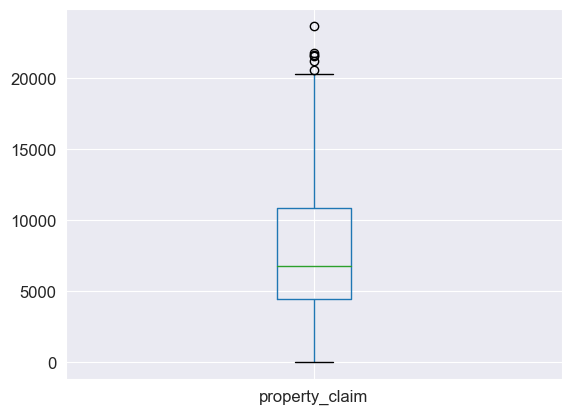

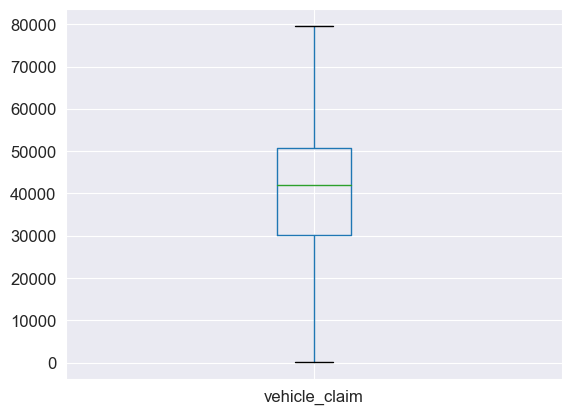

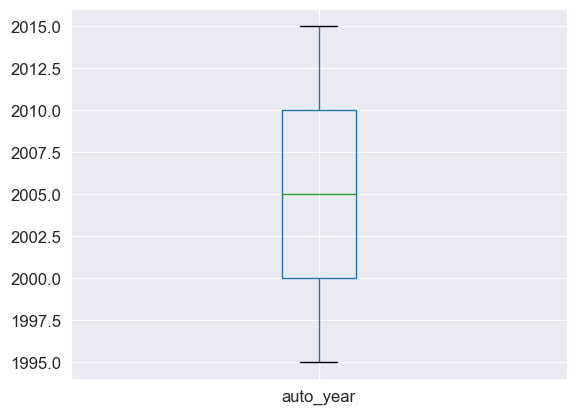

In [27]:
numeric_columns=data.select_dtypes(['number']).columns
for c in numeric_columns:
    plt.figure()
    data.boxplot(c, rot=0, grid=True, fontsize=12);
    plt.show()

In [28]:
def check_outliers(name):
    we=data[name].values
    Q1=np.quantile(we,0.25)
    Q3=np.quantile(we,0.75)
    IQR=Q3-Q1
    print("Q1: ",Q1,"Q3: ",Q3,"IQR:",IQR)
    outliers=np.unique(we[[(n<Q1-1.5*IQR)|(n>Q3+1.5*IQR) for n in we]])
    indexes=[we.tolist().index(i) for i in outliers]
    print("Indexes of outliers: ", len(indexes))
    print("Outlier values", we[indexes])

In [29]:
for col in numeric_columns:
    check_outliers(col)

Q1:  115.75 Q3:  276.25 IQR: 160.5
Indexes of outliers:  0
Outlier values []
Q1:  32.0 Q3:  44.0 IQR: 12.0
Indexes of outliers:  2
Outlier values [63 64]
Q1:  335980.25 Q3:  759099.75 IQR: 423119.5
Indexes of outliers:  0
Outlier values []
Q1:  500.0 Q3:  2000.0 IQR: 1500.0
Indexes of outliers:  0
Outlier values []
Q1:  1089.6075 Q3:  1415.6950000000002 IQR: 326.0875000000001
Indexes of outliers:  9
Outlier values [ 433.33  484.67  538.17  566.11 1922.84 1927.87 1935.85 1969.63 2047.59]
Q1:  0.0 Q3:  0.0 IQR: 0.0
Indexes of outliers:  10
Outlier values [-1000000  2000000  3000000  4000000  5000000  6000000  7000000  8000000
  9000000 10000000]
Q1:  448404.5 Q3:  603251.0 IQR: 154846.5
Indexes of outliers:  0
Outlier values []
Q1:  0.0 Q3:  51025.0 IQR: 51025.0
Indexes of outliers:  0
Outlier values []
Q1:  -51500.0 Q3:  0.0 IQR: 51500.0
Indexes of outliers:  0
Outlier values []
Q1:  6.0 Q3:  17.0 IQR: 11.0
Indexes of outliers:  0
Outlier values []
Q1:  1.0 Q3:  3.0 IQR: 2.0
Indexes of 

In [30]:
data[numeric_columns].describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [31]:
corrle=data[numeric_columns].corr()
corrle

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


[Text(0, 0, 'months_as_customer'),
 Text(0, 1, 'age'),
 Text(0, 2, 'policy_number'),
 Text(0, 3, 'policy_deductable'),
 Text(0, 4, 'policy_annual_premium'),
 Text(0, 5, 'umbrella_limit'),
 Text(0, 6, 'insured_zip'),
 Text(0, 7, 'capital-gains'),
 Text(0, 8, 'capital-loss'),
 Text(0, 9, 'incident_hour_of_the_day'),
 Text(0, 10, 'number_of_vehicles_involved'),
 Text(0, 11, 'bodily_injuries'),
 Text(0, 12, 'witnesses'),
 Text(0, 13, 'total_claim_amount'),
 Text(0, 14, 'injury_claim'),
 Text(0, 15, 'property_claim'),
 Text(0, 16, 'vehicle_claim'),
 Text(0, 17, 'auto_year')]

<Figure size 1000x1000 with 0 Axes>

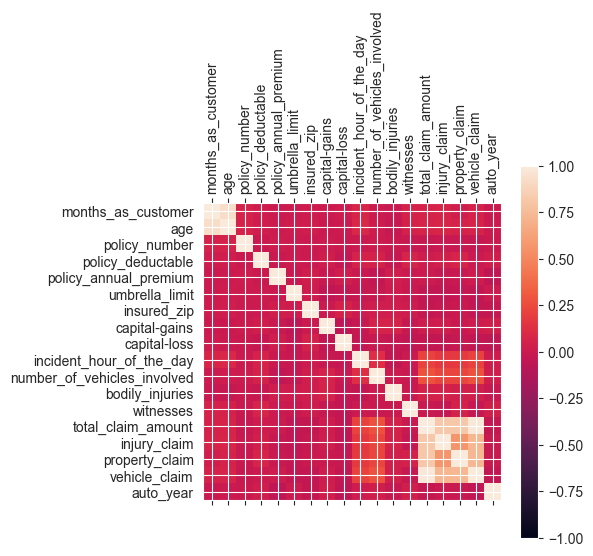

In [32]:
plt.figure(figsize=(10,10))
plt.matshow(corrle,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,len(numeric_columns)), rotation = 90);
plt.yticks(np.arange(0,len(numeric_columns)), rotation = 0);
plt.gca().set_xticklabels(list(numeric_columns))
plt.gca().set_yticklabels(list(numeric_columns))

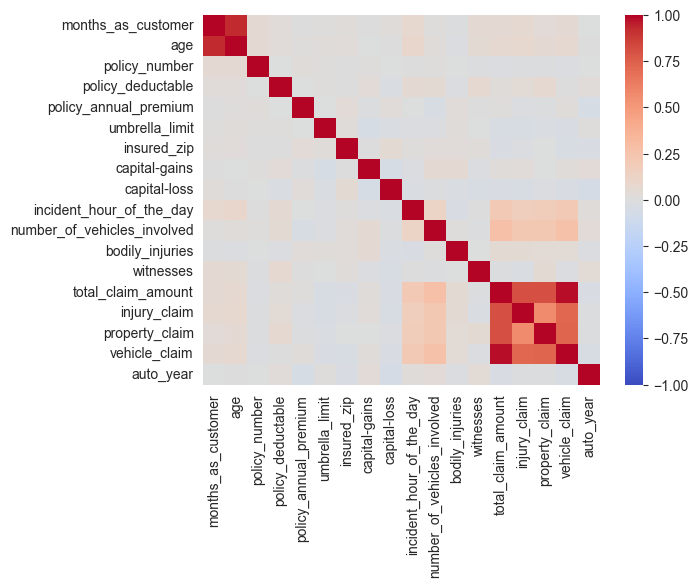

In [33]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

In [34]:
data.insured_sex.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

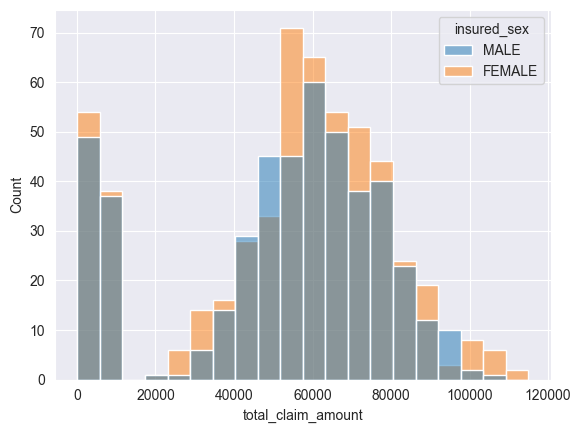

In [35]:
sns.histplot(data=data, x='total_claim_amount', hue='insured_sex'); # histogram và phân loại

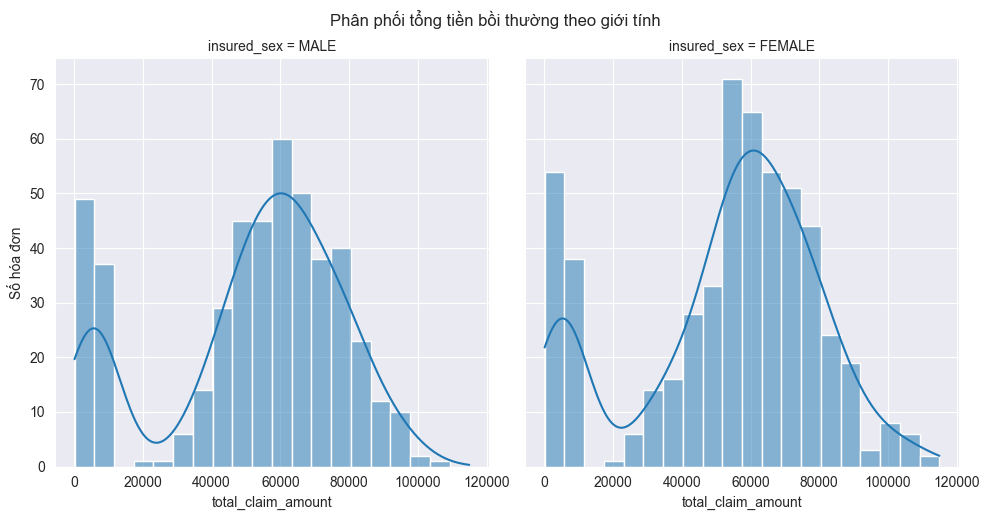

In [36]:
g = sns.displot(data, x = 'total_claim_amount', col= 'insured_sex', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng tiền bồi thường theo giới tính', y = 1.03)
g.set_ylabels('Số hóa đơn')
plt.show()

In [37]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [38]:
df_EDA=data
df_EDA
df_EDA['incident_date']=pd.to_datetime(df_EDA['incident_date'])
df_EDA['month']=df_EDA['incident_date'].dt.month
df_EDA['year']=df_EDA['incident_date'].dt.year
df_EDA

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,month,year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,1,2015
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,1,2015
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,2,2015
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,87200,17440,8720,61040,Honda,Accord,2006,N,2,2015
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,1,2015
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,1,2015
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,46980,5220,5220,36540,Audi,A5,1998,N,2,2015


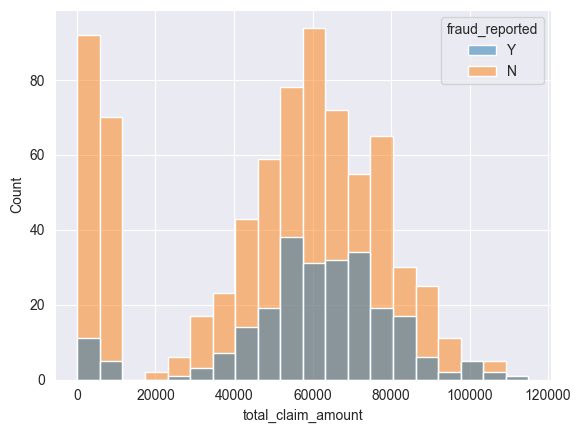

In [39]:
sns.histplot(data=df_EDA, x='total_claim_amount', hue='fraud_reported'); # histogram và phân loại

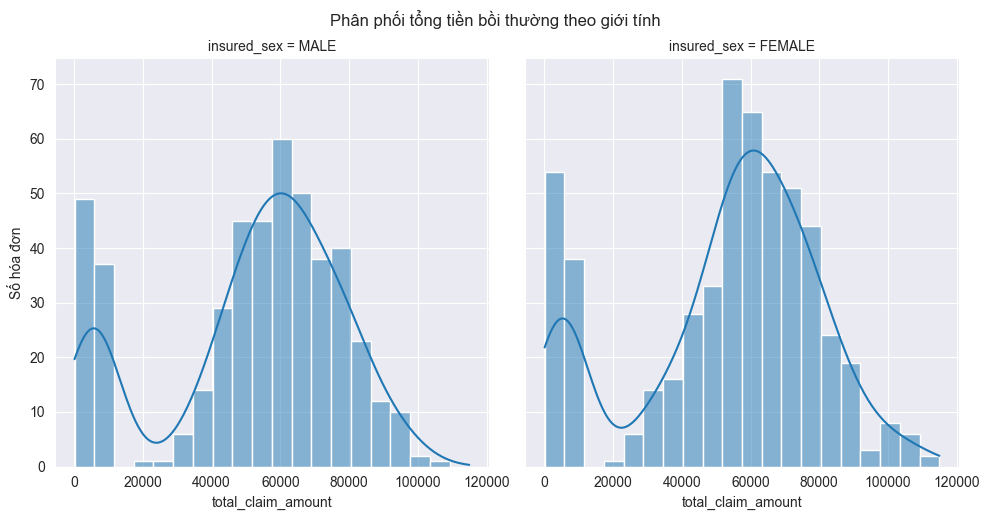

In [40]:
g = sns.displot(df_EDA, x = 'total_claim_amount', col= 'insured_sex', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng tiền bồi thường theo giới tính', y = 1.03)
g.set_ylabels('Số hóa đơn')
plt.show()

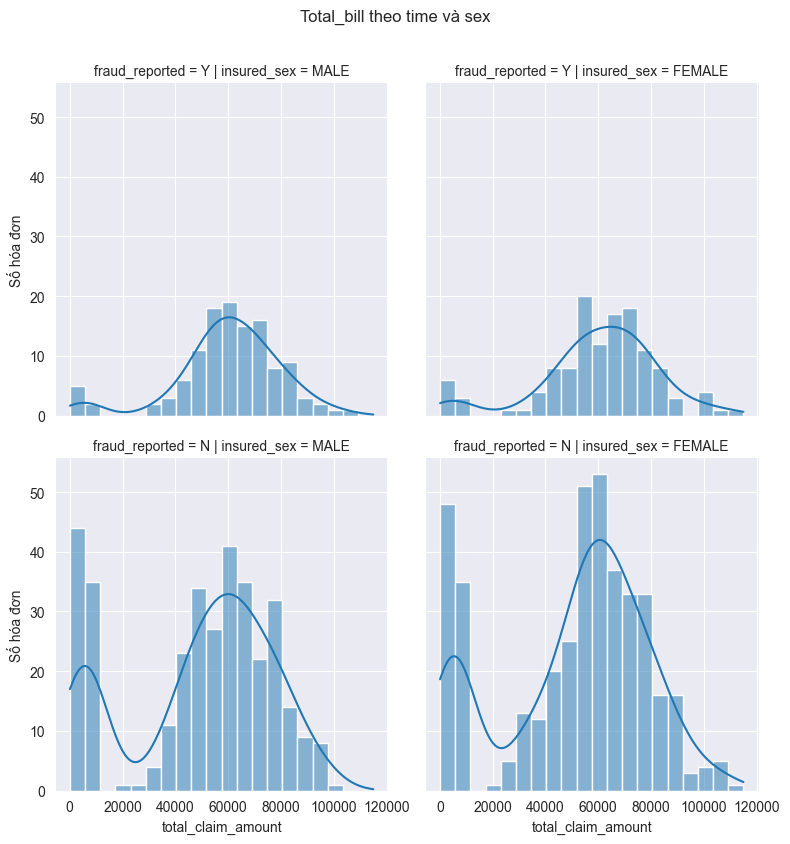

In [69]:
g = sns.displot(df_EDA, x = 'total_claim_amount', col= 'insured_sex', row = 'fraud_reported', height=4,kde=True)
plt.suptitle('Total_bill theo time và sex', y = 1.05)
g.set_ylabels('Số hóa đơn')
plt.show()

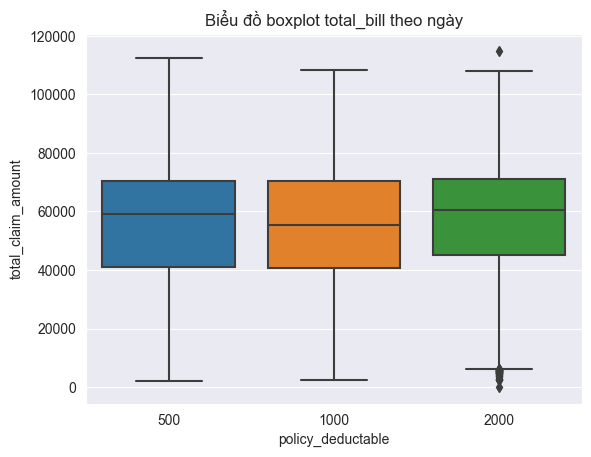

In [42]:
sns.boxplot(data=df_EDA, x="policy_deductable", y="total_claim_amount")
plt.title('Biểu đồ boxplot total_bill theo ngày')
plt.show()

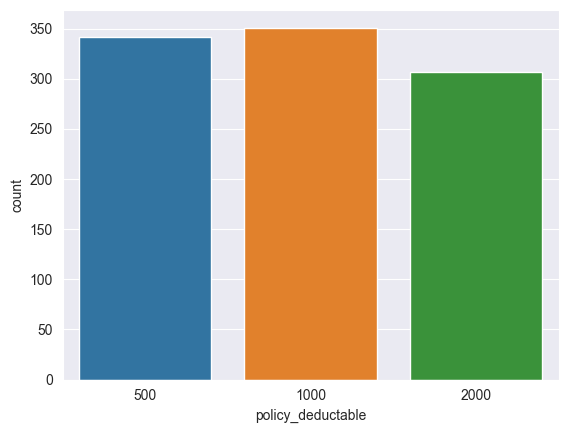

In [43]:
sns.countplot(x='policy_deductable', data=df_EDA);

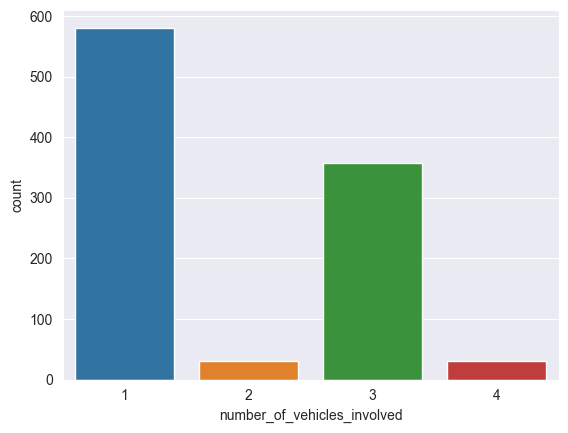

In [44]:
sns.countplot(x='number_of_vehicles_involved', data=df_EDA);

In [45]:
check_claim=df_EDA[['injury_claim','property_claim','vehicle_claim']].sum()
check_claim

injury_claim       7433420
property_claim     7399570
vehicle_claim     37928950
dtype: int64

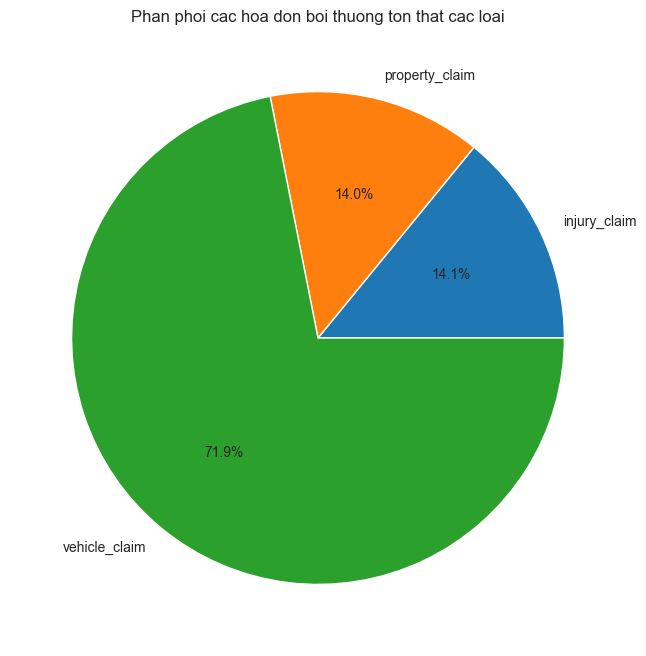

In [46]:
plt.figure(figsize = (10,8))
plt.title('Phan phoi cac hoa don boi thuong ton that cac loai')
plt.pie(check_claim, labels = check_claim.index, autopct = '%1.1f%%', startangle=0)
plt.show()

<Figure size 1000x800 with 0 Axes>

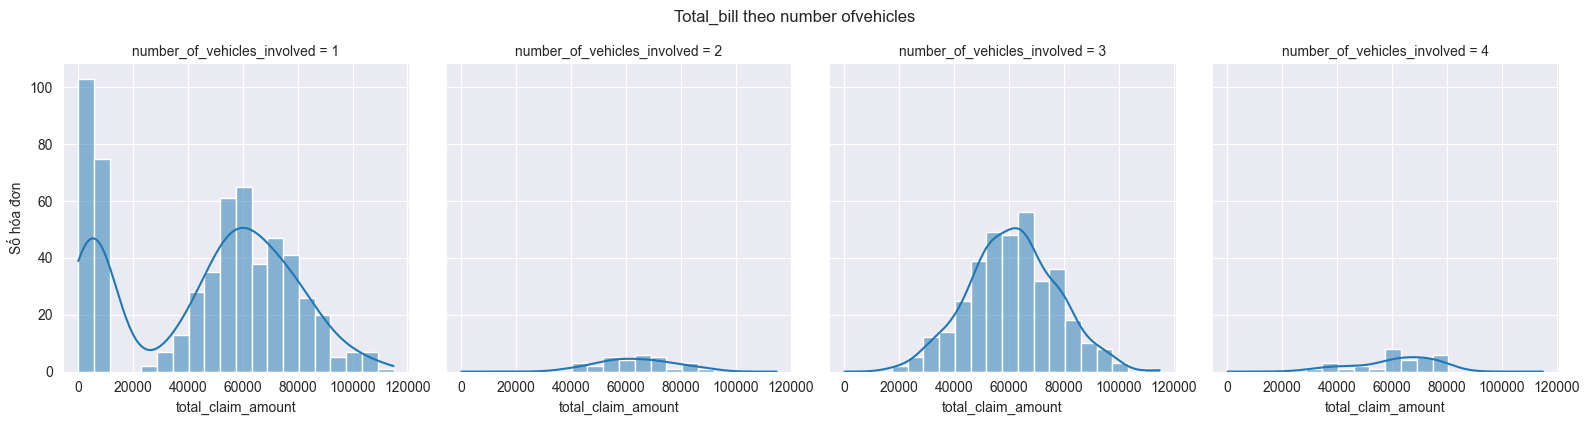

In [70]:
plt.figure(figsize=(10,8))
g = sns.displot(df_EDA, x = 'total_claim_amount', col='number_of_vehicles_involved', height=4,kde=True)
plt.suptitle('Total_bill theo number ofvehicles', y = 1.05)
g.set_ylabels('Số hóa đơn')
plt.show()

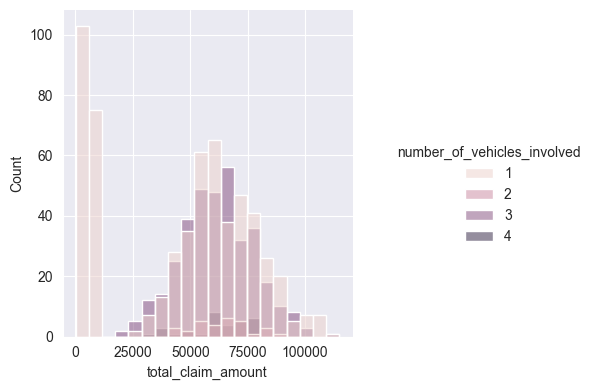

In [48]:
g = sns.displot(df_EDA, x = 'total_claim_amount', hue='number_of_vehicles_involved', height=4)


In [71]:
data.bodily_injuries.value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

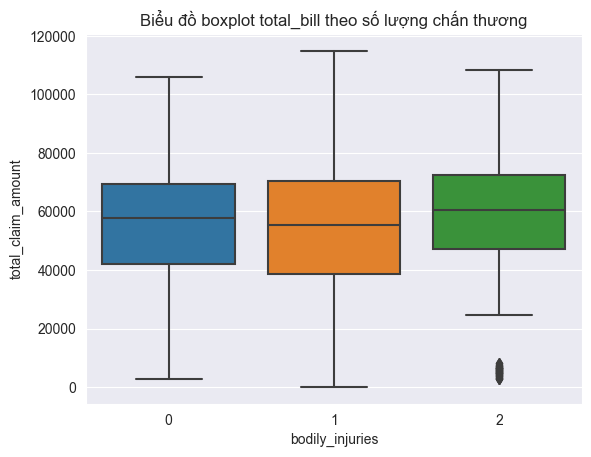

In [49]:
sns.boxplot(data=df_EDA, x="bodily_injuries", y="total_claim_amount")
plt.title('Biểu đồ boxplot total_bill theo số lượng chấn thương')
plt.show()

In [50]:
acc_check=data.groupby(['number_of_vehicles_involved'])['vehicle_claim'].count()
acc_check


number_of_vehicles_involved
1    581
2     30
3    358
4     31
Name: vehicle_claim, dtype: int64

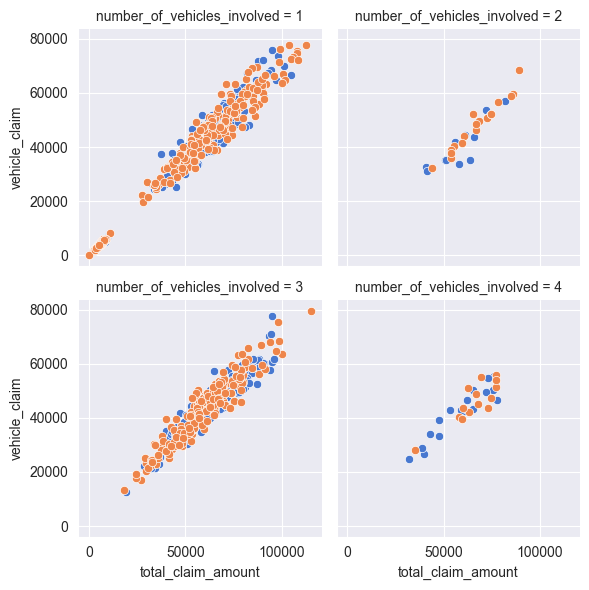

In [51]:
palette = sns.color_palette("muted")
g = sns.FacetGrid(data, col="number_of_vehicles_involved",hue='insured_sex', palette=palette,col_wrap=2)

#Sử dụng hàm map() để vẽ đồ thị trên các ô dữ liệu trong lưới
g.map(sns.scatterplot,"total_claim_amount", "vehicle_claim")
plt.show()

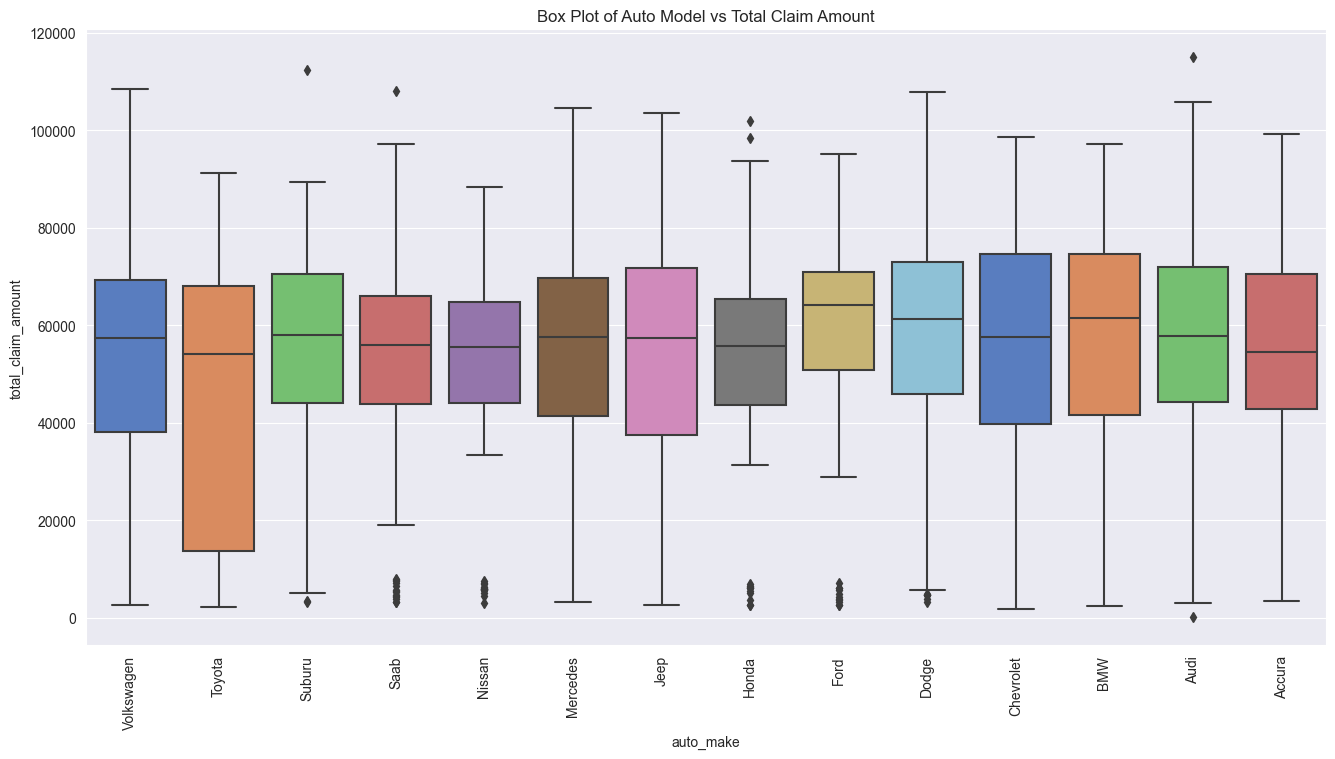

In [52]:
palette = sns.color_palette("muted")
plt.figure(figsize=(16, 8))

my_order = df_EDA.groupby(by=["auto_make"])["total_claim_amount"].median().iloc[::-1].index

sns.boxplot(x = 'auto_make', y = 'total_claim_amount' ,data = df_EDA, order = my_order,palette=palette).set(title = 'Box Plot of Auto Model vs Total Claim Amount')
plt.xticks(rotation = 90);

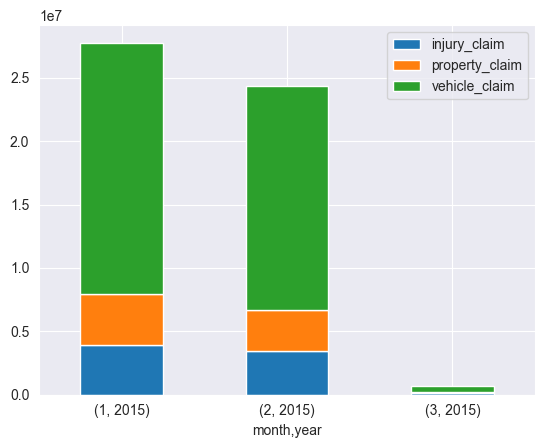

In [53]:
check_feeinmonth=df_EDA.groupby(['month','year'])[['injury_claim','property_claim','vehicle_claim']].sum()
check_feeinmonth.plot.bar(stacked = True, rot = 0)
plt.legend(loc = 'upper right')
plt.show()

In [73]:
df_EDA['incident_date'].value_counts()

2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-01-10    24
2015-02-04    24
2015-01-24    24
2015-01-19    23
2015-01-08    22
2015-01-13    21
2015-01-30    21
2015-02-12    20
2015-02-22    20
2015-01-31    20
2015-02-06    20
2015-02-21    19
2015-01-01    19
2015-02-23    19
2015-01-12    19
2015-01-14    19
2015-01-21    19
2015-01-03    18
2015-02-14    18
2015-02-01    18
2015-02-28    18
2015-01-20    18
2015-01-18    18
2015-02-25    18
2015-01-06    17
2015-01-09    17
2015-02-08    17
2015-02-24    17
2015-02-26    17
2015-02-13    16
2015-02-15    16
2015-02-16    16
2015-02-05    16
2015-01-16    16
2015-01-17    15
2015-02-18    15
2015-01-28    15
2015-01-15    15
2015-01-22    14
2015-02-20    14
2015-02-27    14
2015-01-23    13
2015-02-03    13
2015-01-27    13
2015-02-09    13
2015-01-04    12
2015-03-01    12
2015-01-26    11
2015-01-29    11
2015-01-02    11
2015-02-19    10
2015-02-11    10
2015-02-10    10
2015-02-07    10
2015-01-25    10
2015-01-11    

In [68]:
df_EDA.groupby(['month','year']).count()

,,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
month,year,,,,,,,,,,,,,,,,,,,,,
1,2015,516,516,516,516,516,516,516,516,516,516,...,516,516,516,516,516,516,516,516,516,516
2,2015,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
3,2015,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


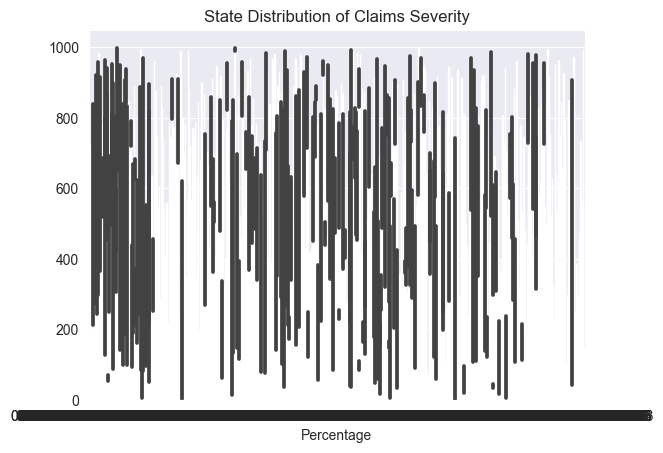

0      0.135723
1      0.009609
2      0.065672
3      0.120162
4      0.012319
         ...   
995    0.165271
996    0.205603
997    0.127933
998    0.089041
999    0.009590
Name: total_claim_amount, Length: 1000, dtype: float64

In [54]:
State_claims_pct = df_EDA.total_claim_amount * 100/ df_EDA.total_claim_amount.sum()

sns.barplot(x=State_claims_pct, y=State_claims_pct.index)

plt.title('State Distribution of Claims Severity')
plt.ylabel(None);
plt.xlabel('Percentage')
plt.show()
State_claims_pct

In [55]:
data_predict=data[numeric_columns]
data_predict

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [56]:
result=['total_claim_amount','injury_claim','property_claim','vehicle_claim']
x = data_predict.drop(result,axis=1)
y = data_predict['total_claim_amount']
x

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,1998


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print([X_train.shape,Y_train.shape],[X_test.shape,Y_test.shape])

[(670, 14), (670,)] [(330, 14), (330,)]


In [58]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(670, 14)

input_layer = Input(shape=(X_train.shape[1],))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(3, activation='relu')(hidden_layer)

# Tính tổng của ba outputs
sum_layer = Lambda(lambda x: K.sum(x, axis=1, keepdims=True))(output_layer)

# Tạo mô hình
model = Model(inputs=input_layer, outputs= sum_layer)

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mse')  # Bạn có thể định nghĩa loss function tùy chỉnh nếu cần

# Kiểm tra cấu trúc mô hình
model.summary()

In [60]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [61]:
model.fit(x=X_train,y=Y_train.values,
          validation_data=(X_test,Y_test.values),
          batch_size=128,epochs=400)


Epoch 1/400
6/6 [==============================] - 1s 46ms/step - loss: 3569787392.0000 - val_loss: 3298268672.0000
Epoch 2/400
6/6 [==============================] - 0s 8ms/step - loss: 3569765376.0000 - val_loss: 3298251264.0000
Epoch 3/400
6/6 [==============================] - 0s 7ms/step - loss: 3569748736.0000 - val_loss: 3298237440.0000
Epoch 4/400
6/6 [==============================] - 0s 10ms/step - loss: 3569733888.0000 - val_loss: 3298223104.0000
Epoch 5/400
6/6 [==============================] - 0s 5ms/step - loss: 3569718016.0000 - val_loss: 3298205952.0000
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 3569698304.0000 - val_loss: 3298183680.0000
Epoch 7/400
6/6 [==============================] - 0s 9ms/step - loss: 3569672704.0000 - val_loss: 3298155520.0000
Epoch 8/400
6/6 [==============================] - 0s 7ms/step - loss: 3569639424.0000 - val_loss: 3298117888.0000
Epoch 9/400
6/6 [==============================] - 0s 6ms/step - loss: 3569595

Epoch 72/400
6/6 [==============================] - 0s 6ms/step - loss: 748862720.0000 - val_loss: 666233984.0000
Epoch 73/400
6/6 [==============================] - 0s 7ms/step - loss: 743898624.0000 - val_loss: 665367680.0000
Epoch 74/400
6/6 [==============================] - 0s 5ms/step - loss: 741486784.0000 - val_loss: 665207488.0000
Epoch 75/400
6/6 [==============================] - 0s 7ms/step - loss: 740583168.0000 - val_loss: 665420672.0000
Epoch 76/400
6/6 [==============================] - 0s 4ms/step - loss: 738947136.0000 - val_loss: 665632768.0000
Epoch 77/400
6/6 [==============================] - 0s 5ms/step - loss: 738113088.0000 - val_loss: 665983296.0000
Epoch 78/400
6/6 [==============================] - 0s 5ms/step - loss: 737827904.0000 - val_loss: 666513344.0000
Epoch 79/400
6/6 [==============================] - 0s 7ms/step - loss: 737463360.0000 - val_loss: 666824832.0000
Epoch 80/400
6/6 [==============================] - 0s 7ms/step - loss: 737099904.0000 -

6/6 [==============================] - 0s 6ms/step - loss: 693295616.0000 - val_loss: 630097984.0000
Epoch 215/400
6/6 [==============================] - 0s 7ms/step - loss: 692693120.0000 - val_loss: 628367616.0000
Epoch 216/400
6/6 [==============================] - 0s 7ms/step - loss: 692252928.0000 - val_loss: 627763008.0000
Epoch 217/400
6/6 [==============================] - 0s 6ms/step - loss: 691982784.0000 - val_loss: 627652992.0000
Epoch 218/400
6/6 [==============================] - 0s 6ms/step - loss: 691610432.0000 - val_loss: 628001984.0000
Epoch 219/400
6/6 [==============================] - 0s 6ms/step - loss: 691431808.0000 - val_loss: 627724864.0000
Epoch 220/400
6/6 [==============================] - 0s 7ms/step - loss: 691195840.0000 - val_loss: 627392128.0000
Epoch 221/400
6/6 [==============================] - 0s 5ms/step - loss: 690908928.0000 - val_loss: 627077824.0000
Epoch 222/400
6/6 [==============================] - 0s 5ms/step - loss: 690573568.0000 - val_

6/6 [==============================] - 0s 5ms/step - loss: 659516480.0000 - val_loss: 603296576.0000
Epoch 357/400
6/6 [==============================] - 0s 7ms/step - loss: 659383808.0000 - val_loss: 603015680.0000
Epoch 358/400
6/6 [==============================] - 0s 7ms/step - loss: 659615744.0000 - val_loss: 604034368.0000
Epoch 359/400
6/6 [==============================] - 0s 4ms/step - loss: 658959104.0000 - val_loss: 604178304.0000
Epoch 360/400
6/6 [==============================] - 0s 5ms/step - loss: 658890048.0000 - val_loss: 603655488.0000
Epoch 361/400
6/6 [==============================] - 0s 6ms/step - loss: 658624832.0000 - val_loss: 603571072.0000
Epoch 362/400
6/6 [==============================] - 0s 7ms/step - loss: 658459584.0000 - val_loss: 603454976.0000
Epoch 363/400
6/6 [==============================] - 0s 7ms/step - loss: 658325120.0000 - val_loss: 603022592.0000
Epoch 364/400
6/6 [==============================] - 0s 7ms/step - loss: 658169856.0000 - val_

<Axes: >

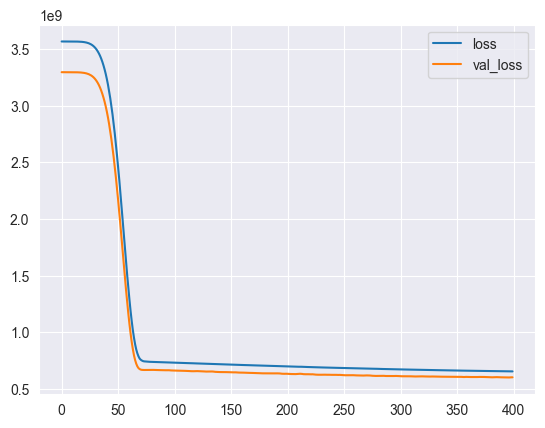

In [62]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [63]:
model.evaluate(X_test,Y_test)

11/11 [==============================] - 0s 941us/step - loss: 600394432.0000


600394432.0

In [64]:
indx=rd.randint(0,X_test.shape[0])
sample=X_test[indx,:]
sample = np.expand_dims(X_test[indx, :], axis=0)
y_predict=model.predict(sample)
Y_check = Y_test.iloc[indx]
print('True:', Y_check)
print('Predicted',y_predict)

1/1 [==============================] - 0s 79ms/step
True: 58500
Predicted [[47712.176]]


In [ ]:
sample.shape